# Fuel Quality Data Wrangling

A fuel quality data collected from the Federal Energy Regulatory Commission is going to be explored in this work

I am Qudus and this is an assignment from Hamoye Data Science Internship. It is a pleasure being a part of the program. I am just learning and I hope I get to improve my reporting skills as time goes on.

Let's get to business

### Importing needed packages

In [1]:
# Import libraries

import numpy as np
import pandas as pd

# For visualization, the following libraries will be imported
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rc('figure', figsize=(20,10))

I am going to import the data which has already been saved in the same directory I am working on

In [2]:
# Read csv file

fuel_data = pd.read_csv('fuel_ferc1.csv')

# Let's see what our data looks like
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [3]:
# Describe the data

fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1997_12_55_2_10,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


From the statistical summary, it can be seen that the number of observations is 29523 except for "fuel_unit" that has 29343 which means there are missing values, this will be corroborated by checking for missing values. There are few outliers in the data as it is seen that the last three columns have negative values. It can also be deduced that there are very large values by looking at the difference between the maximum values and the 75th percentile for columns "fuel_mmbtu_per_unit", "fuel_cost_per_unit_burned", "fuel_cost_per_unit_delivered" and 'fuel_cost_per_mmbtu"

In [4]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

"fuel_unit" has 180 missing values. I deduced that each fuel type has a particular fuel unit mostly used with it so I grouped the data by fuel type to know the modal fuel unit in each fuel type

I checked the number of times each fuel unit appears, that is not really necessary though.

In [5]:
fuel_data['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

As  I have said earlier, we determine the modal fuel unit for each fuel type. This is done below

In [6]:
print('The number of each group in fuel_unit by fuel type')
print('--------------------------------------------------')
fuel_data.groupby('fuel_type_code_pudl')['fuel_unit'].value_counts()

The number of each group in fuel_unit by fuel type
--------------------------------------------------


fuel_type_code_pudl  fuel_unit
coal                 ton           8438
                     mmbtu           52
                     mcf              5
                     bbl              1
gas                  mcf          11333
                     mmbtu           94
                     ton              4
                     bbl              2
nuclear              gramsU         464
                     kgU            110
                     mwhth          100
                     mwdth           95
                     mmbtu           34
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                ton             77
                     bbl             42
                     mcf              9
                     gal              3
waste                ton            436
                     bbl              1
Name: fuel_unit, dtype: int64

Although, "mcf" is the most appeared in the data, using that to fill the missing values may not be sufficient enough so I checked for the most appeared fuel unit for each fuel type and it can be deduced that:
- ton is mostly used for coal
- mcf is mostly used for gas
- gramsU is mostly used for nuclear
- bbl is mostly used for oil
- ton is mostly used for waste

In [7]:
# Insert the most appeared group in fuel_type_code_pudl in the missing values of fuel_unit

fuel_data['fuel_unit'] = fuel_data.groupby('fuel_type_code_pudl')['fuel_unit'].transform(lambda x: x.fillna(x.mode()[0]))

Then I checked if the missing values has been filled with the following code.

In [8]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [9]:
# Let us describe the data again

fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29523,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1997_12_55_2_10,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11407,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


# Data Visualization

### Correlation

I checked the correlation of the variables to see if any two are too correlated

In [10]:
cor = fuel_data.corr()
cor

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


It is a tedious work trying to check the correlaton values right? You do not have to worry, let us visualise the correlation using a heat map. I changed the color map to make it look more attractive.

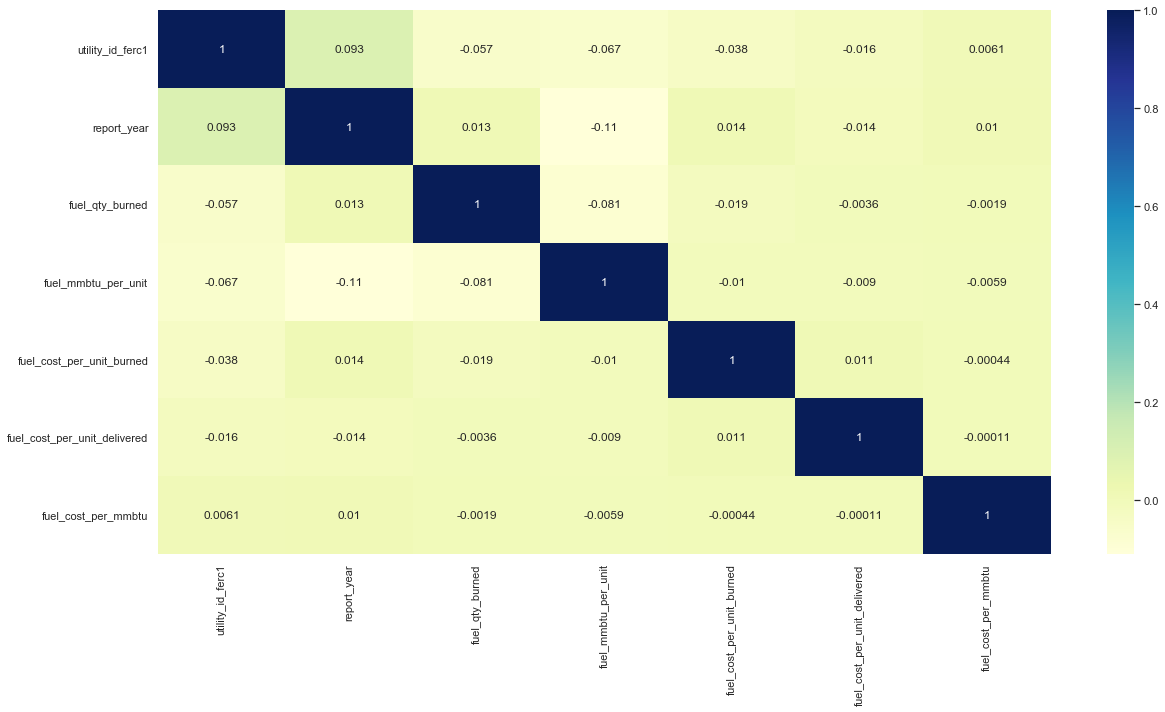

In [11]:
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

It can easily be deduced from the heat map that there is no relationship between any of the variables

### Bar chart to see how many times each fuel appears in the data

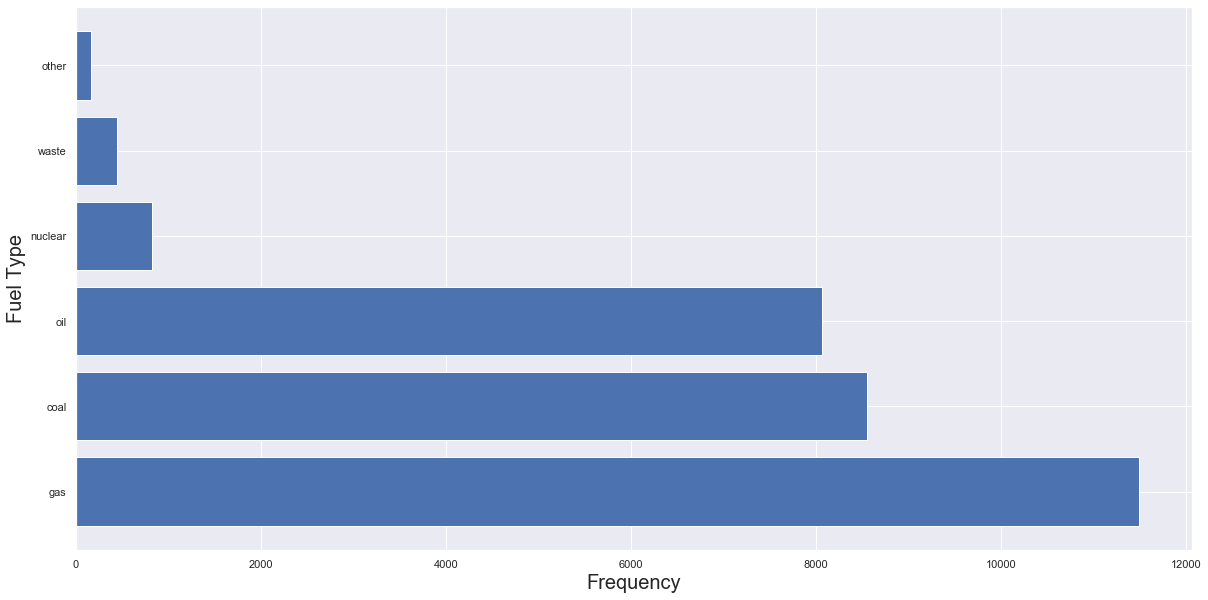

In [12]:
plt.barh(fuel_data['fuel_type_code_pudl'].value_counts().index, fuel_data['fuel_type_code_pudl'].value_counts().values)
plt.ylabel('Fuel Type', fontsize=20)
plt.xlabel('Frequency', fontsize=20)
plt.show()

The above bar chart shows the fuel types and the number of times they are used in the data.

It can be deduced that gas is mostly used followed by coal, oil, nuclear and waste

### Barchart showing the quantity of each fuel burned

We need to know the most used fuel type over the years, let us visualise it using a bar chart

In [13]:
print('The sum of fuel quantity burned by the fuel types are')
print('--------------------------------------------------')
fuel_data.groupby('fuel_type_code_pudl')['fuel_qty_burned'].sum()

The sum of fuel quantity burned by the fuel types are
--------------------------------------------------


fuel_type_code_pudl
coal       1.626898e+10
gas        5.562880e+10
nuclear    4.462058e+09
oil        5.089737e+08
other      4.923388e+08
waste      5.168139e+07
Name: fuel_qty_burned, dtype: float64

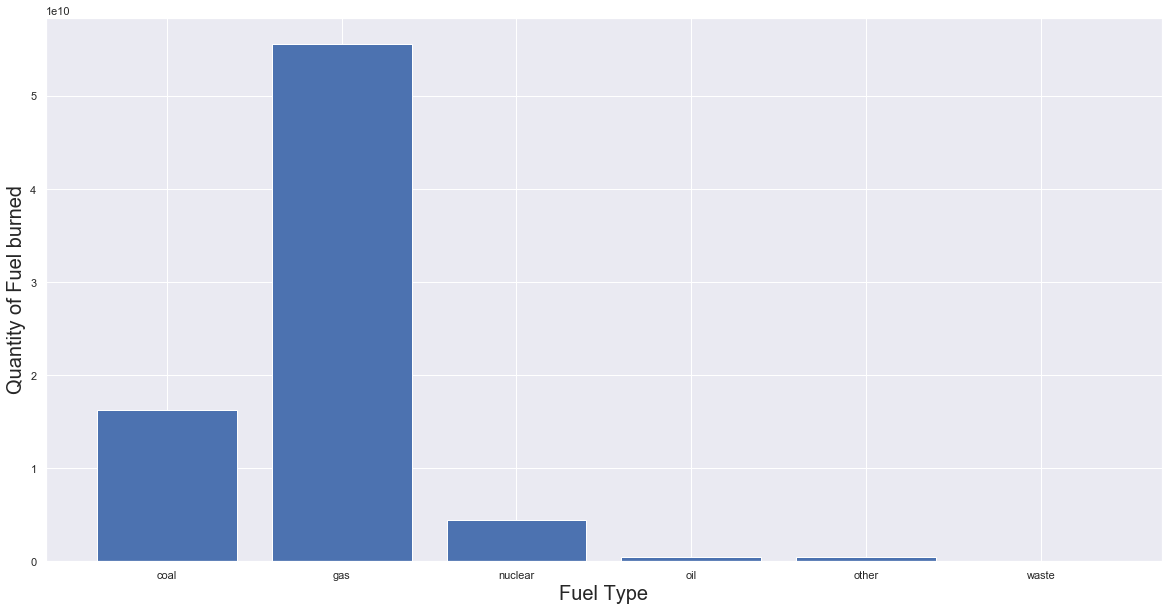

In [14]:
X = fuel_data.groupby('fuel_type_code_pudl')['fuel_qty_burned'].sum().index
Y = fuel_data.groupby('fuel_type_code_pudl')['fuel_qty_burned'].sum().values
plt.bar(X, Y)
plt.ylabel('Quantity of Fuel burned', fontsize=20)
plt.xlabel('Fuel Type', fontsize=20)
plt.show()

The above bar chart shows the fuel types and the quantity burned.

It can be deduced that gas is mostly used followed by coal, nuclear, oil, other fuel types and waste

### Barchart showing Fuel Cost for each Fuel Type

It is neccessary for us to know the average cost of using the fuel types and it will be visualize using a bar chart

In [15]:
print('The average cost of the fuels are')
print('--------------------------------------------------')
fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_mmbtu'].mean()

The average cost of the fuels are
--------------------------------------------------


fuel_type_code_pudl
coal         1.787190
gas          5.408876
nuclear      1.716559
oil         12.698732
other      155.084910
waste      822.709937
Name: fuel_cost_per_mmbtu, dtype: float64

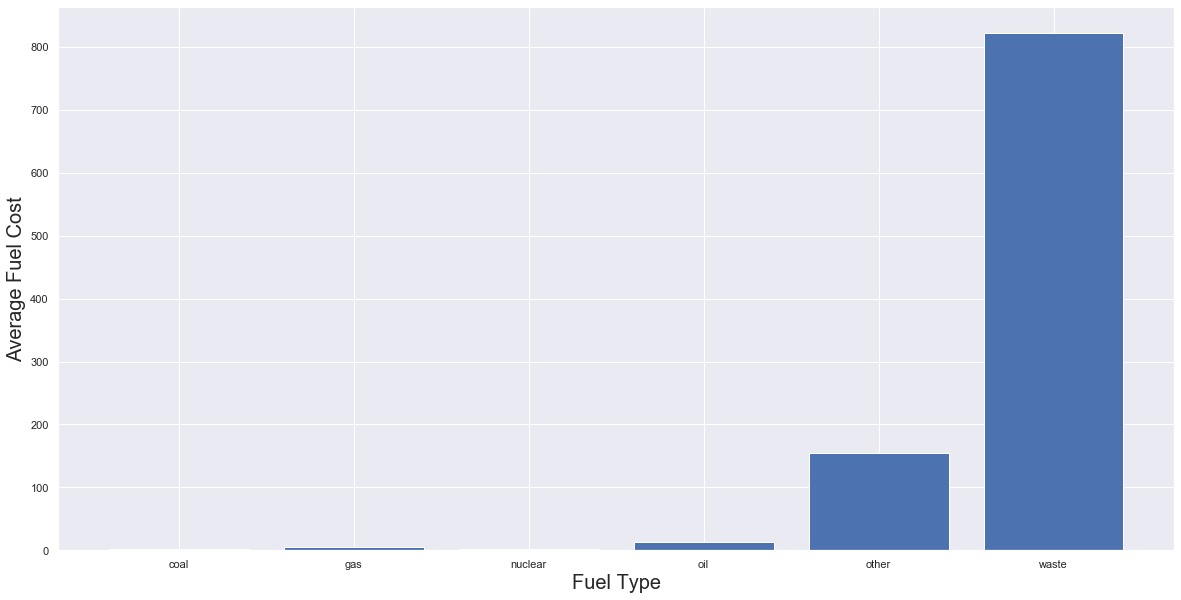

In [16]:
X_1 = fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_mmbtu'].mean().index
Y_1 = fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_mmbtu'].mean().values
plt.bar(X_1, Y_1)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Average Fuel Cost', fontsize=20)
plt.show()

Of all the fuels, waste is the most expensive at an average of 822 per mmbtu, other fuels are at a distant second. The cost of others are relatively low.

### Quantity of Fuel Burned Yearly

I feel it is neccessary to visualise how the quantity of fuel burned each year increases/decreases. To do this, I drafted a pivot table showing the quantity of fuel burned each year then a line plot is plotted for visualization

Due to the presence of extremely large values, a logarithmic scale is used for the plot.

In [17]:
print('The sum of fuel quantity burned yearly by the fuel types are')
print('--------------------------------------------------')
piv = fuel_data.pivot_table(index='fuel_type_code_pudl', columns='report_year', values='fuel_qty_burned', aggfunc='sum')
print(piv)

The sum of fuel quantity burned yearly by the fuel types are
--------------------------------------------------
report_year                  1994          1995          1996          1997  \
fuel_type_code_pudl                                                           
coal                 7.172082e+08  1.257398e+09  6.988514e+08  8.169024e+08   
gas                  2.432212e+09  2.570880e+09  1.915218e+09  2.039925e+09   
nuclear              2.069366e+08  2.054081e+08  1.487384e+08  1.625564e+08   
oil                  1.469716e+06  8.091780e+05  3.637754e+06  5.384931e+07   
other                5.094458e+06  4.220548e+08  1.144943e+06  3.211371e+06   
waste                1.242241e+06  1.642051e+06  1.102632e+06  1.528774e+06   

report_year                  1998          1999          2000          2001  \
fuel_type_code_pudl                                                           
coal                 8.982095e+08  8.805301e+08  8.620492e+08  8.564316e+08   
gas               

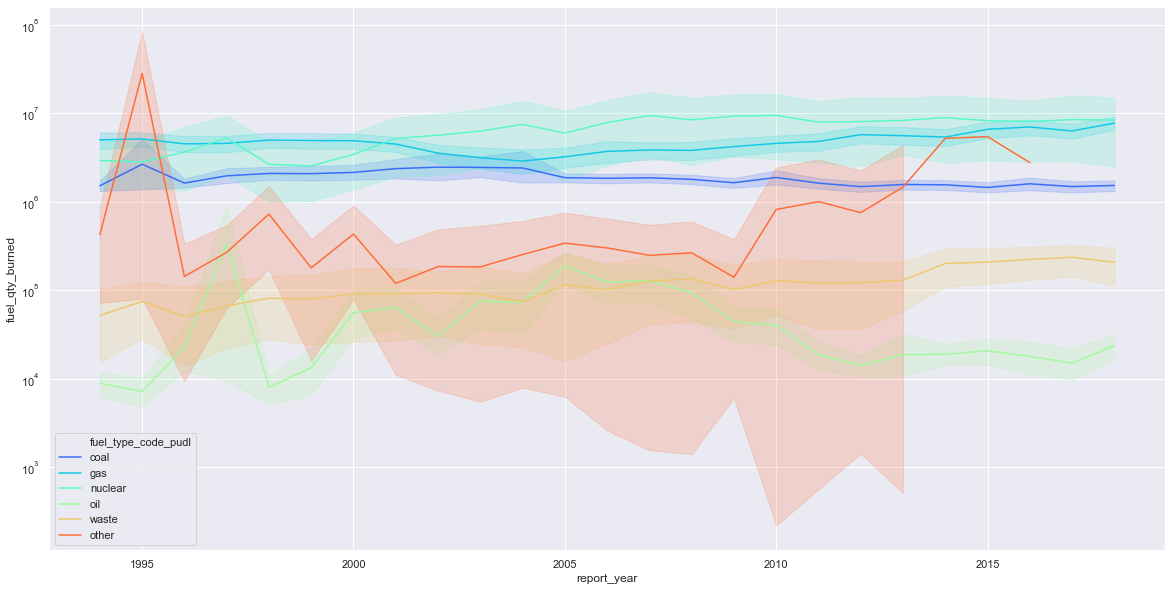

In [18]:
line = sns.lineplot(x='report_year', y='fuel_qty_burned', hue='fuel_type_code_pudl', data=fuel_data, palette='rainbow')
line.set_yscale('log')

It can be deduced from the above line plot that
- the use of coal has reduced though not very obvious
- the use of gas is relatively stable
- the use nuclear has increased over the years
- the use of oil has seen drastic reduction after 2005
- there is no notable change in the use of waste

### Cost of Fuel Yearly

I also created a pivot table and a line plot to visualize the cost of fuel yearly

In [19]:
piv = fuel_data.pivot_table(index='fuel_type_code_pudl', columns='report_year', values='fuel_cost_per_mmbtu', aggfunc='sum')
print(piv)

report_year                1994        1995        1996        1997  \
fuel_type_code_pudl                                                   
coal                  682.14697   663.74149   581.57661   551.68662   
gas                  1368.51941  1215.67299  1317.92815  1500.72369   
nuclear               136.53400   142.15000    14.00100    61.85400   
oil                  1147.21573   787.26450  1027.16797   986.20660   
other                  27.97400    33.71200    17.93500   291.69600   
waste                 450.02700   602.93300   -25.49100    13.98700   

report_year                1998        1999        2000        2001  \
fuel_type_code_pudl                                                   
coal                  557.06574   540.98716   506.31631   474.98225   
gas                  1497.21333  1489.90376  2211.16230  2285.87893   
nuclear               224.95900   221.61500   127.01300    15.10500   
oil                   490.02500   348.50989  2598.86316  3138.99512   
other

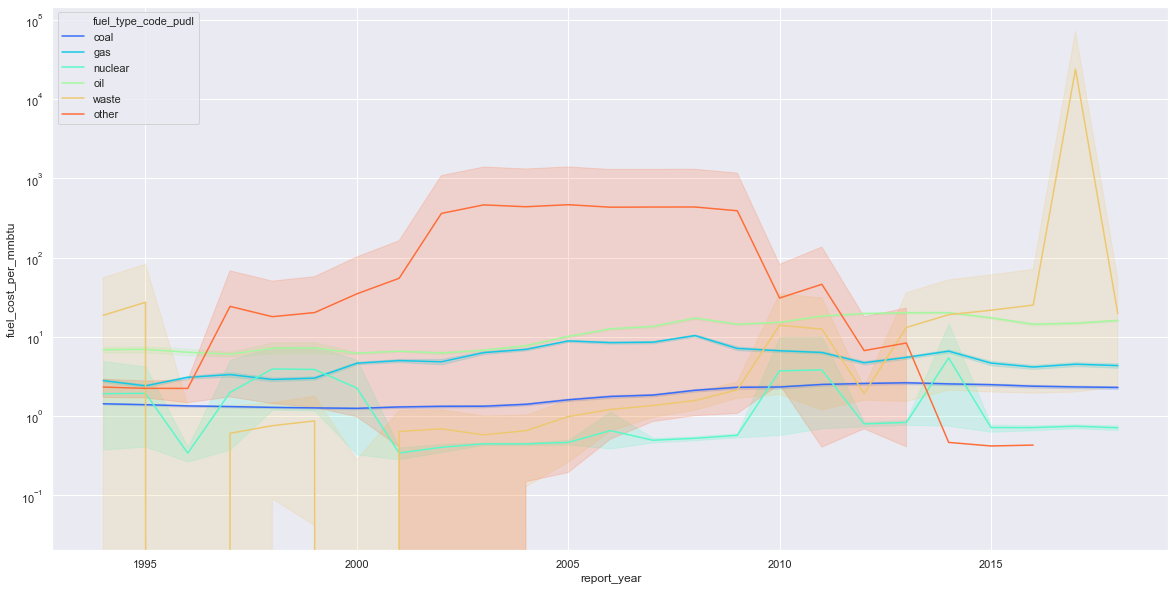

In [20]:
line2 = sns.lineplot(x='report_year', y='fuel_cost_per_mmbtu', hue='fuel_type_code_pudl', data=fuel_data, palette='rainbow')
line2.set_yscale('log')

It can be deduced from the above line plot that
- the cost of coal has been relatively stable over the years
- there is no notable change in the cost of gas
- cost of nuclear has been fluctuating over the years
- the cost of oil has been increasing slightly but there is a slight reduction recently
- there is a drastic increase in the cost of waste over the years but it is currently on a sharp decrease

### Conclusion

This is only an exploration of the data, more analysis can be carried out using this data. There are possible outliers in the data especially for waste, its cost are sometimes outrageously high or low. This have to be considered when full analysis will be done using this data.

Thank you for reading.